Для каждого типа аппроксимации найти такой порядок n, чтобы погрешность аппроксимации в равномерной метрике не превосходила ε = 0.01.

#### 1) Равномерная аппроксимация функции $x(t)$ частичной суммой ряда Фурье по многочленам Чебышева I рода:

In [73]:
from inspect import *
import numpy as np
from sympy import *
import math as mat
import matplotlib.pyplot as plt
%matplotlib inline
init_printing()

In [74]:
p,t = symbols('p t')

p_norm = symbols('p_norm')
p_norm = [] #ортонормированные многочлены Чебышёва
norma = 0

x,a = symbols('x a')
x = (t - 2*t**2)*exp(-t**2)
c = [] #коэф. фурье

s_k, temp = symbols('s_k temp')
s_k = [] #частичные суммы ряда Фурье

temp, temp2 = symbols('temp temp2')

count = 0
e = 0.01
c2 = np.arange(-1, 1, 0.01)
max_cheb = 0

while True:
    p = chebyshevt(count,t)
    norma = sqrt(integrate((p**2)*(1/sqrt(1-t**2)), (t, -1, 1)))
    p_norm.append(p/norma)
    a = simplify(x * p_norm[count] * (1/sqrt(1-t**2)))
    c.append(Integral(a,(t,-1,1)).evalf())
    temp = c[count]*p_norm[count]
    if (count == 0):
        s_k.append(temp)
        count = count + 1
        continue
    s_k.append(s_k[count-1] + temp)
    
    temp2 = abs(x - s_k[count])
    max_tayl = [temp2.subs(t, val) for val in c2]
    if (max(max_tayl) <= e):
        print('n = ', count)
        break
    count = count + 1

n =  6


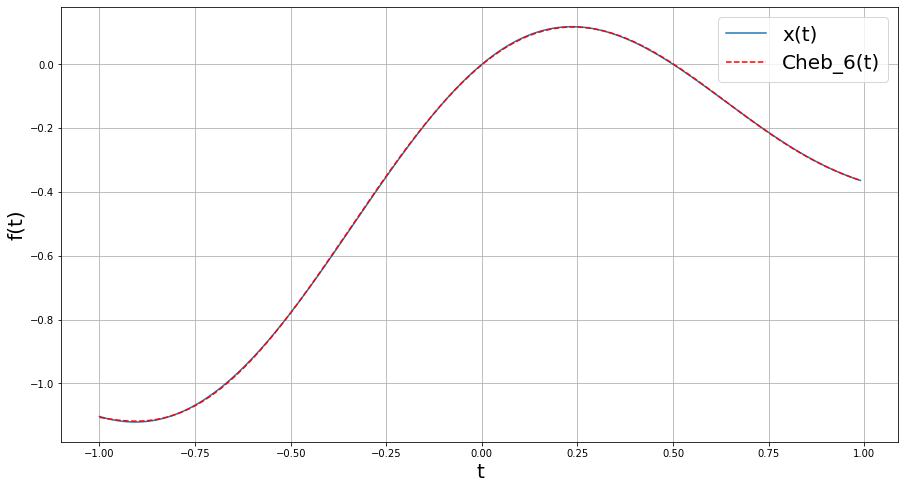

In [75]:
f = symbols('f')
f = (t-2*t**2)*exp(-t**2)

x = np.arange(-1, 1, 0.01)

y1 = [f.subs(t, val) for val in x]
y2 = [s_k[6].subs(t, val) for val in x]

plt.figure(figsize=(15,8))
plt.xlabel('t', fontsize = 20)
plt.ylabel('f(t)', fontsize = 20)
plt.plot(x, y1, x, y2, 'r--')
plt.legend(['x(t)', 'Cheb_6(t)'], fontsize = 20)
plt.grid()
plt.show()

In [76]:
func, x_t = symbols('func x_t')
x_t = (t-2*t**2)*exp(-t**2)

func = abs(x_t - s_k[count])
max_cheb = [func.subs(t, val) for val in c2]
max(max_cheb).n()

Получем значение:
$$
\begin{array}{lcl} 
    ||x - Cheb_6||_{C[-1;1]} = \max\limits_{t \in [-1;1]}|x(t) - Cheb_6(t)| \approx 0.00273760857048865\\ 
\end{array} 
$$


Таким образом, при данном виде аппроксимации, порядок n, при котором погрешность аппроксимации не превышает 0.01, равен 6 <br>
### Ответ: n = 6

#### 2) Равномерная аппроксимация функции $x(t)$ многочленом Тейлора

In [77]:
x = symbols('x')

def f(x):
    y = (x - 2*x**2)*exp(-x**2)
    return y

def get_polynomial(function, t0, degree):
    lines_list  = getsource(function).split("\n")
    for line in lines_list:
        if '=' in line:
            func_def = line

    elements = func_def.split('=')
    line = ' '.join(elements[1:])
    sympy_function = sympify(line)
    
    i = 0
    taylor_exp = Integer(0)
    while i <= degree:
        taylor_exp = taylor_exp + (diff(sympy_function,x,i).subs(x,t0))/(factorial(i))*(x-t0)**i
        i += 1
    return taylor_exp

taylor_n = symbols('taylor_n')

In [78]:
temp = symbols('temp')

count = 0
e = 0.01
c = np.arange(-1, 1, 0.01)

while True:
    taylor_n = get_polynomial(f,0,count).subs(x,t)
    temp = abs(f(t) - taylor_n)
    max_tayl = [temp.subs(t, val) for val in c]
    if (max(max_tayl) <= e):
        print('n = ', count)
        break
    count = count + 1

n =  12


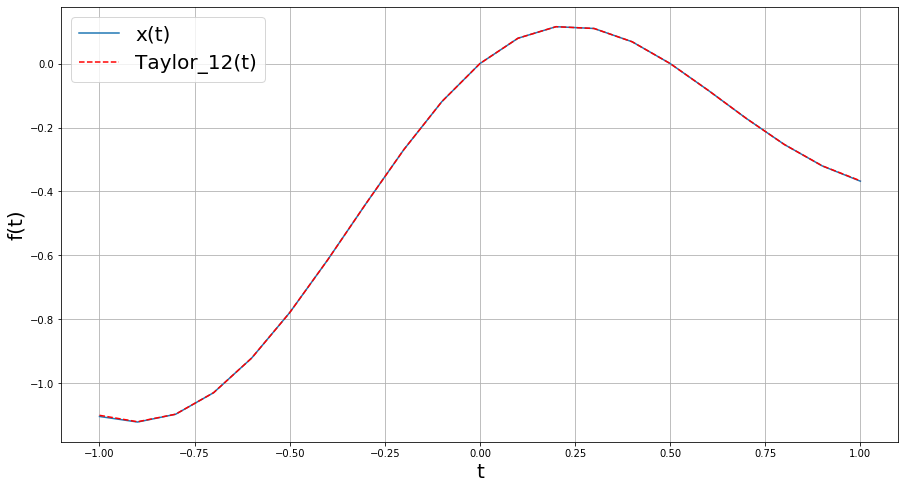

In [79]:
x = np.arange(-1, 1.1, 0.1)

y1 = [f(t).subs(t,val) for val in x]
y2 = [taylor_n.subs(t, val) for val in x]

plt.figure(figsize=(15,8))
plt.xlabel('t', fontsize = 20)
plt.ylabel('f(t)', fontsize = 20)
plt.plot(x, y1, x, y2, 'r--')
plt.legend(['x(t)', 'Taylor_12(t)'], fontsize = 20)
plt.grid()
plt.show()

In [80]:
func, x_t = symbols('func x_t')
x_t = (t-2*t**2)*exp(-t**2)

func = abs(x_t - taylor_n)
max_tayl = [func.subs(t, val) for val in x]

max(max_tayl).n()

Получем значение:
$$
\begin{array}{lcl} 
    ||x - Taylor_{12}||_{C[-1;1]} = \max\limits_{t \in [-1;1]}|x(t) - Taylor_{12}(t)| \approx 0.00363832351432691\\ 
\end{array} 
$$


Таким образом, при данном виде аппроксимации, порядок n, при котором погрешность аппроксимации не превышает 0.01, равен 12 <br>
### Ответ: n = 12